In [233]:
%matplotlib inline

In [234]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [235]:
%%bash
cd data
ls

survey_results_public.csv
survey_results_schema.csv
yo_muslim.csv


In [236]:
%%bash
ls

README.md
SO_notebook_2.ipynb
data


In [237]:
df1 = pd.read_csv('data/survey_results_schema.csv')

In [238]:
df2 = pd.read_csv('data/survey_results_public.csv') #Check warning

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [239]:
print(df1.shape)
print(df2.shape)

(129, 2)
(98855, 129)


<Container object of 2 artists>

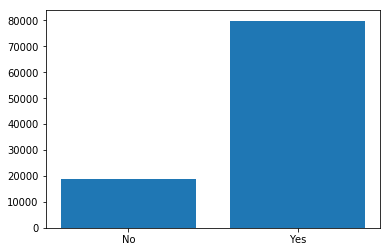

In [240]:
#Hobby Coders
plt.figure(1)
for_plot = df2.groupby(["Hobby"]).size()
for_plot = for_plot.reset_index()
plt.bar(x = for_plot["Hobby"] , height = for_plot[0])

<Container object of 2 artists>

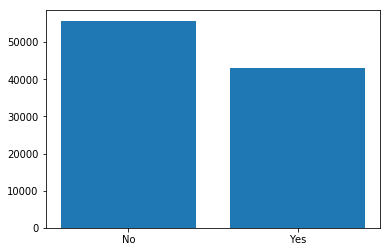

In [241]:
#Open Sources
plt.figure(1)
for_plot = df2.groupby(["OpenSource"]).size()
for_plot = for_plot.reset_index()
plt.bar(x = for_plot["OpenSource"] , height = for_plot[0])

<Container object of 2 artists>

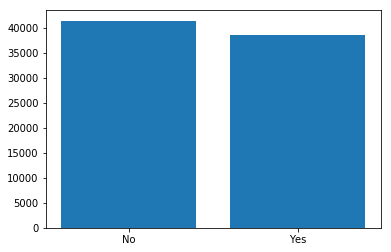

In [242]:
#Of the hobbyisits how many open sourcers and how many not?? ... Hmm not much of difference
plt.figure(1)
for_plot = df2[df2['Hobby'] == "Yes"]
for_plot = for_plot.groupby(["OpenSource"]).size()
for_plot = for_plot.reset_index()
plt.bar(x = for_plot["OpenSource"] , height = for_plot[0])

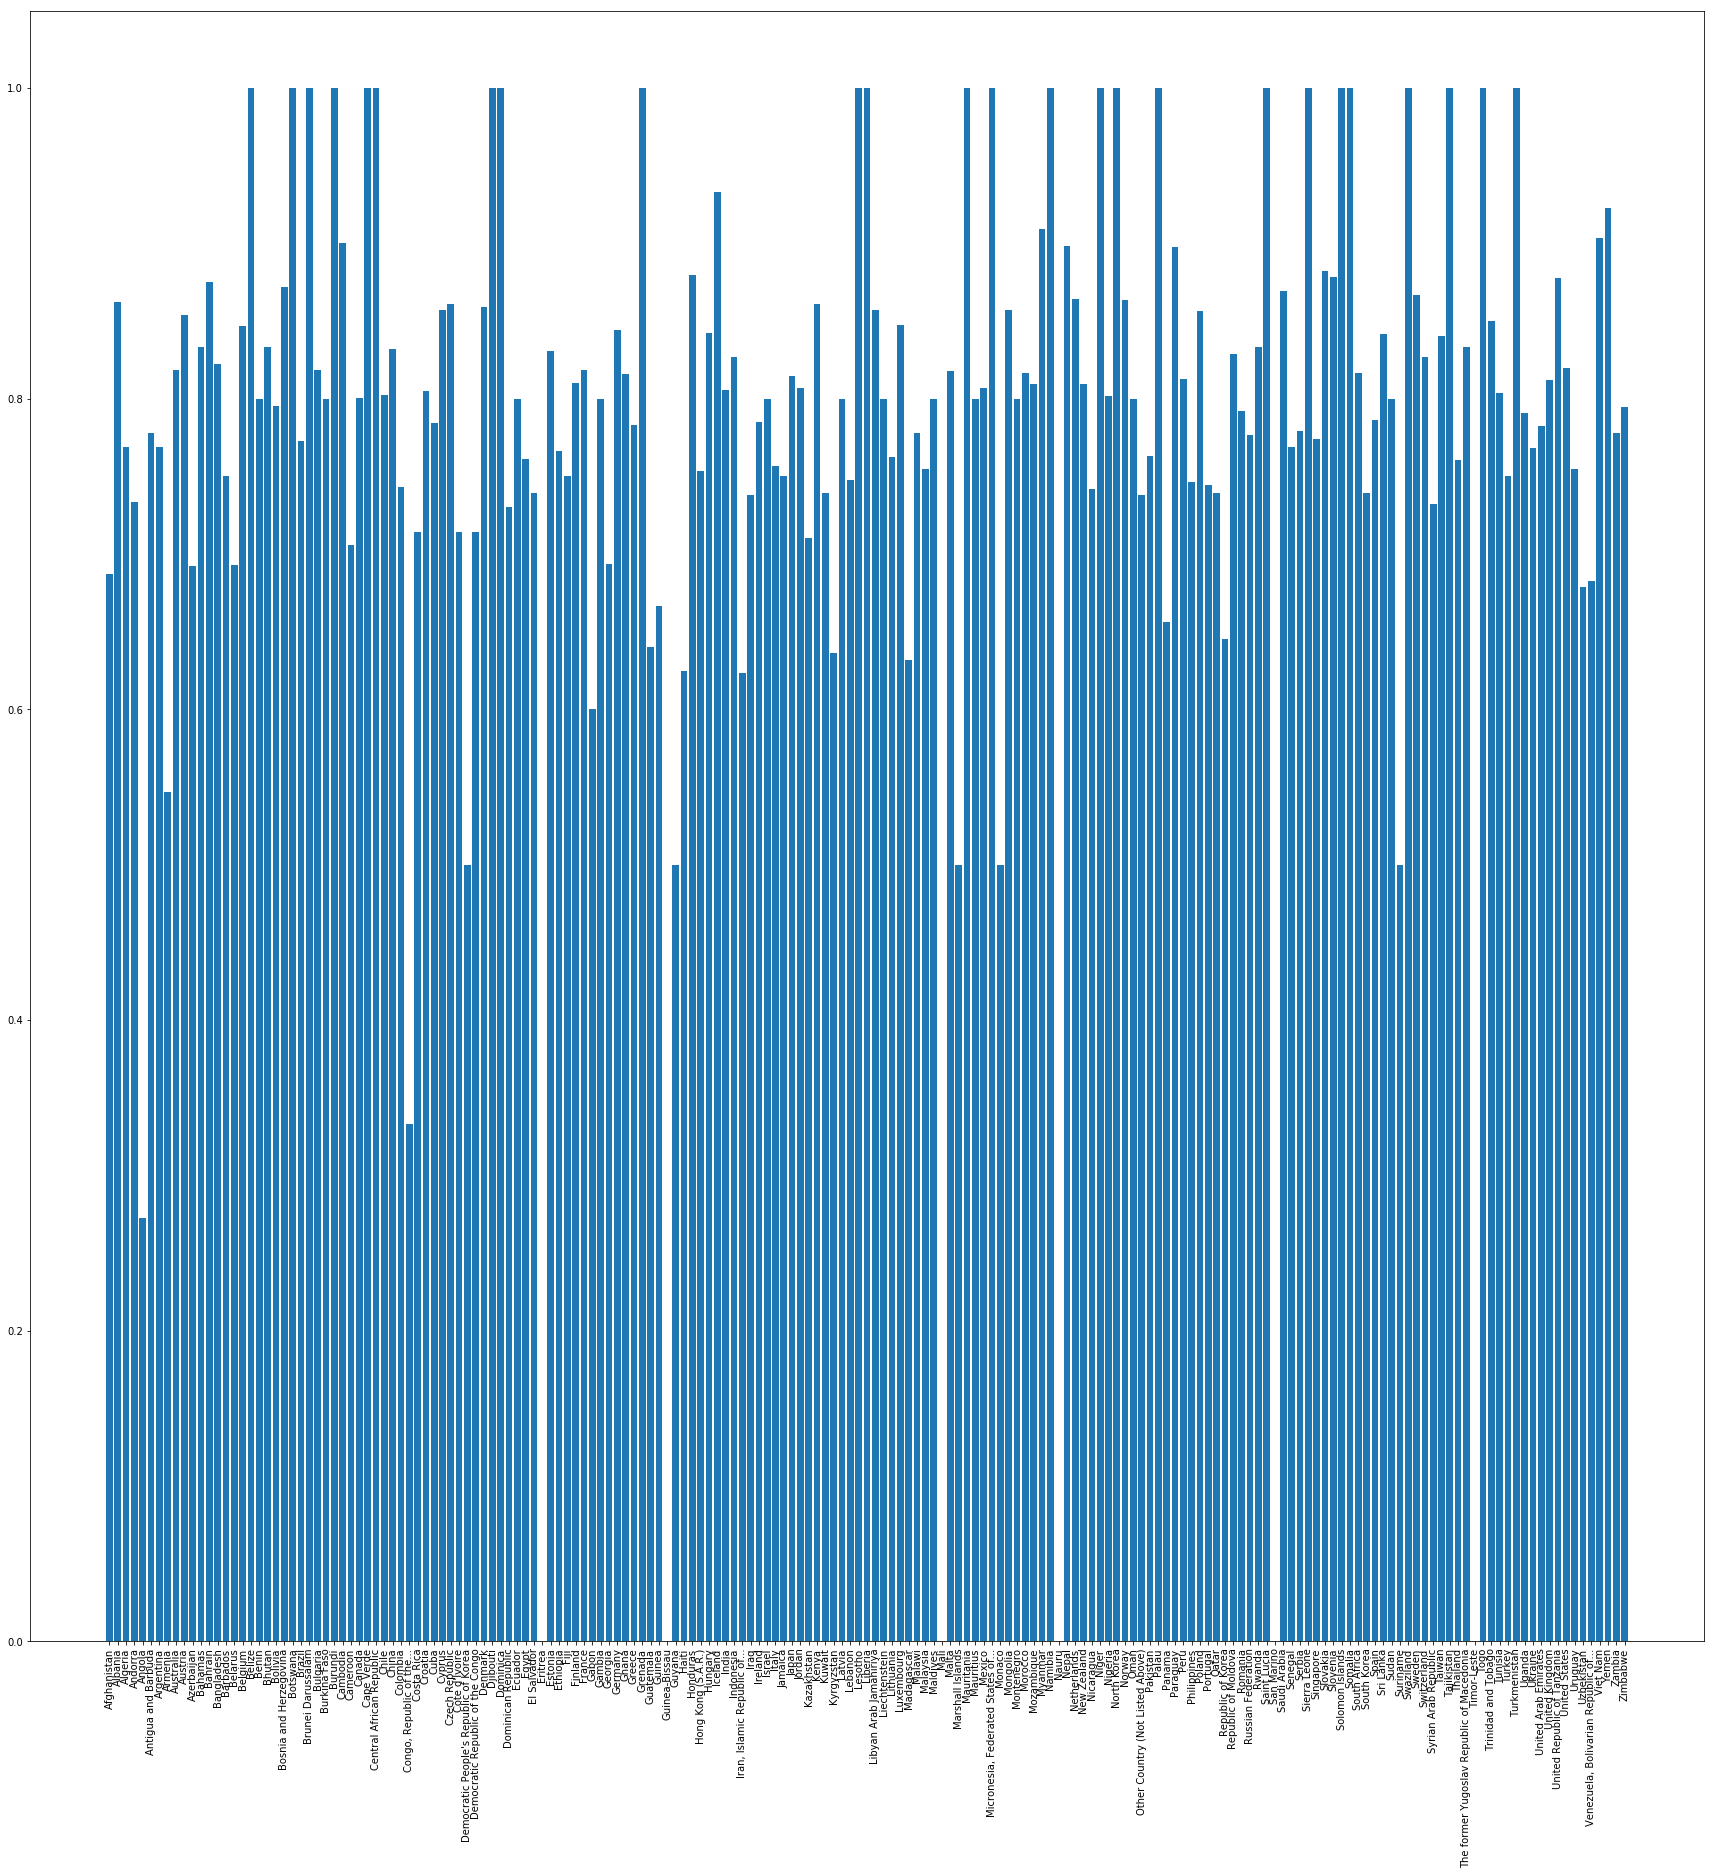

In [243]:
#Where do the most hobbyists come from and non_hobbyists?? ,,, what about zero hobby countries
for_plot = df2
for_plot["Hobby"] = for_plot["Hobby"].map({'Yes': 1, 'No': 0})
for_plot = for_plot.groupby(['Country']).agg({'Hobby':np.mean})
for_plot = for_plot.reset_index()
plt.figure(1 , figsize = (30,30))#This can be converted into geographical plot.
plt.bar(x = for_plot["Country"],height = for_plot["Hobby"])
plt.xticks(rotation = 90)
plt.show()

In [244]:
for_plot["Hobby"][52]

0.0

In [245]:
#We need concentrate on 101 to 116 for the task, as to identify participation/involvement 
#in community according to the objective we need to map relevant columns like, Sex, Country, Job_descreption to these
df1.loc[101:116]

,Column,QuestionText
101,StackOverflowRecommend,How likely is it that you would recommend Stac...
102,StackOverflowVisit,How frequently would you say you visit Stack O...
103,StackOverflowHasAccount,Do you have a Stack Overflow account?
104,StackOverflowParticipate,How frequently would you say you participate i...
105,StackOverflowJobs,Have you ever used or visited Stack Overflow J...
106,StackOverflowDevStory,Do you have an up-to-date Developer Story on S...
107,StackOverflowJobsRecommend,How likely is it that you would recommend Stac...
108,StackOverflowConsiderMember,Do you consider yourself a member of the Stack...
109,HypotheticalTools1,Please rate your interest in participating in ...
110,HypotheticalTools2,Please rate your interest in participating in ...


In [246]:
#Lets filter out people who have Stackoverflow in their learning sources
#stack_learners = df2[-df2["SelfTaughtTypes"].isnull()]
df2["is_stack_learner"] = df2["SelfTaughtTypes"].str.contains("Stack Overflow")

In [247]:
#Which country has most sized Stack_learners
#for_plot = df2.groupby(["Country"])["is_stack_learner"].mean()
#for_plot = for_plot.reset_index()
#for_plot = for_plot[-(for_plot["is_stack_learner"] == 1)] # Removing 100% users
#plt.figure(1 , figsize = (30,30))


#Weirdo , there are some countries ,, have exactly 50%  users. Have to check them out,... and no one is below 50% ,, Weird

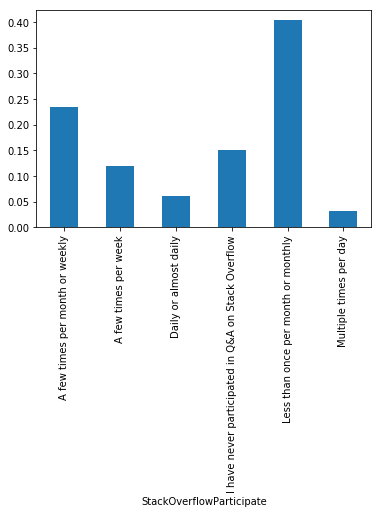

In [248]:
#40% use less than once per month, 25% weekly few times, 15% Never participated
for_plot = df2[-pd.isnull(df2["is_stack_learner"])]
for_plot = for_plot[for_plot["is_stack_learner"]]
for_plot = for_plot.groupby(["StackOverflowParticipate"]).size().reset_index()
for_plot[0] = for_plot[0].apply(lambda x : x/for_plot[0].sum())
plt.figure(1)
for_plot.plot(x ="StackOverflowParticipate", kind = "bar" , legend = False)

#So about 55% of users who use stack overflow for learning end up participating very rarely. This subset must be 
#done with further investigation

In [249]:
#Muslim Countries???
yo_muslim = pd.read_csv("data/yo_muslim.csv")

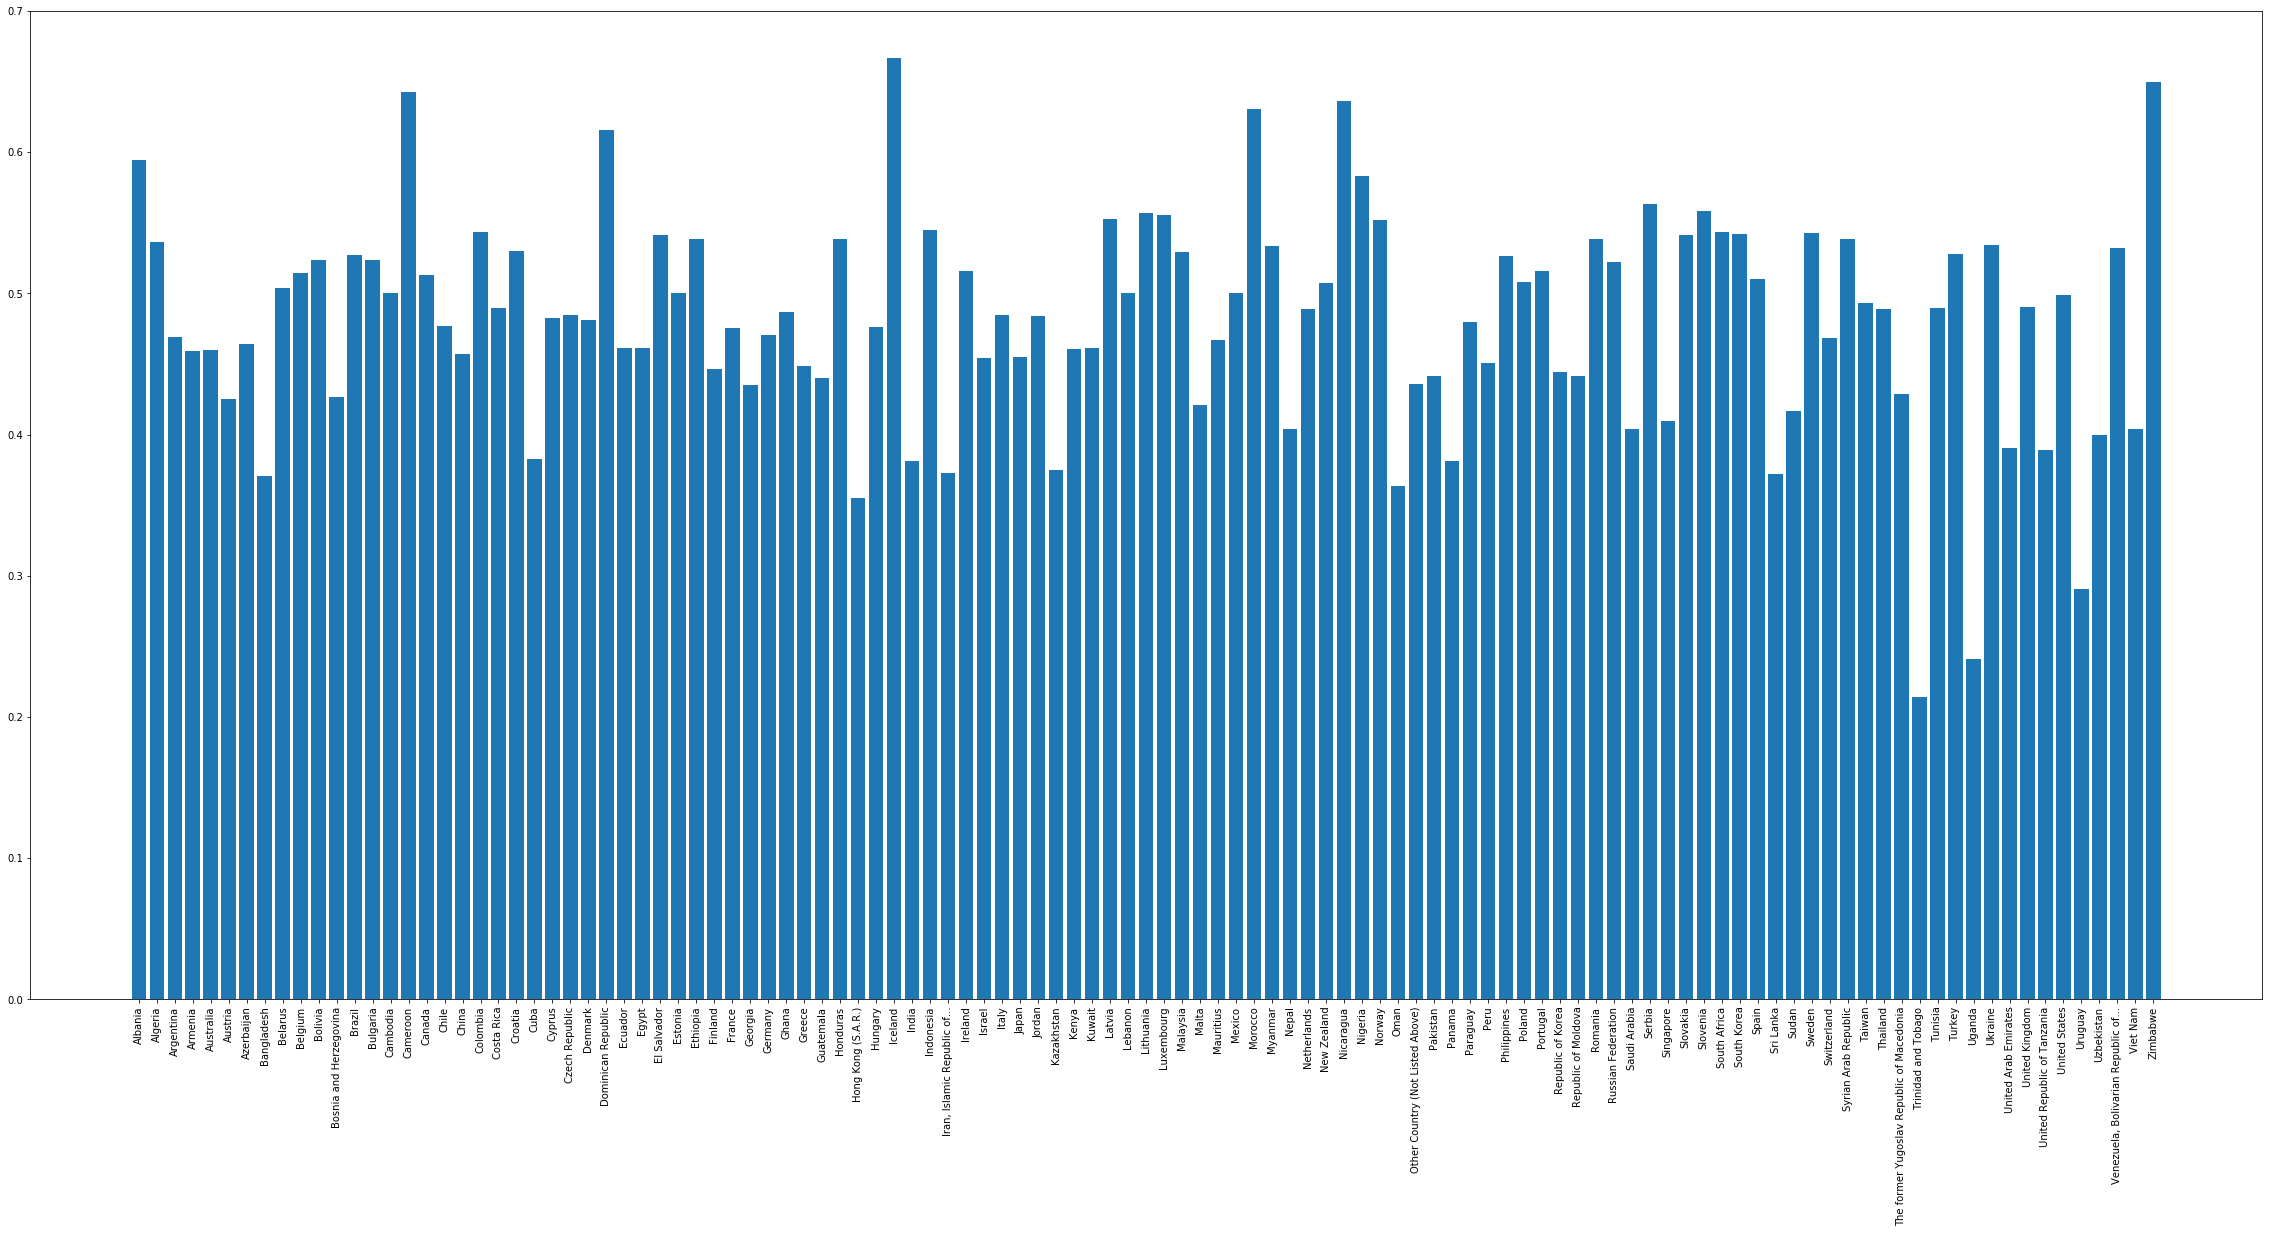

In [250]:
#Lets see the where the learners who dont participate are majorly from keep countries with stack learners > 10??
for_plot = df2[-pd.isnull(df2["is_stack_learner"])]
for_plot = for_plot[for_plot["is_stack_learner"]]
for_plot2 = for_plot.groupby(["Country"]).size().reset_index()
for_plot2 = for_plot2[for_plot2[0] > 10]
for_plot2.head()
for_plot = for_plot[for_plot.Country.isin(for_plot2.Country)]
for_plot['is_islamic'] = for_plot.Country.isin(yo_muslim["Name"])
for_plot["Non_Participaters"] = (for_plot['StackOverflowParticipate'] == "I have never participated in Q&A on Stack Overflow") | (for_plot['StackOverflowParticipate'] == "Less than once per month or monthly")
for_plota = for_plot.groupby(["Country"])["Non_Participaters"].mean().reset_index()
plt.figure(1 , figsize = (40,40))
plt.subplot(2,1,1)
plt.bar(x = for_plota["Country"] , height = for_plota["Non_Participaters"])
plt.xticks(rotation = 90)
#plt.subplot(2,1,2)
#for_plotb = for_plot.groupby(["is_islamic"])["Non_Participaters"].mean().reset_index()
#for_plotb.head()
#plt.bar(x = for_plotb["is_islamic"] , height = for_plotb["Non_Participaters"])
plt.show()

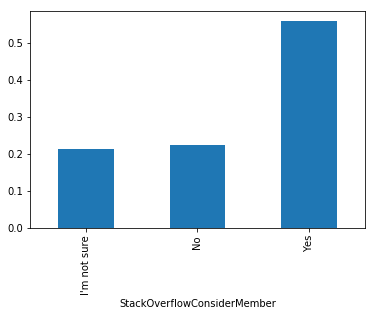

In [251]:
#How many learners consider themsevles to be the members of the Site
for_plot = df2[-pd.isnull(df2["is_stack_learner"])]
for_plot = for_plot[for_plot["is_stack_learner"]]
for_plot = for_plot.groupby(["StackOverflowConsiderMember"]).size().reset_index()
for_plot[0] = for_plot[0].apply(lambda x : x/for_plot[0].sum())
plt.figure(1)
for_plot.plot(x ="StackOverflowConsiderMember", kind = "bar" , legend = False)

#Approx 40% of Stack learners dont cosider / not sure themselves as members... to be studied

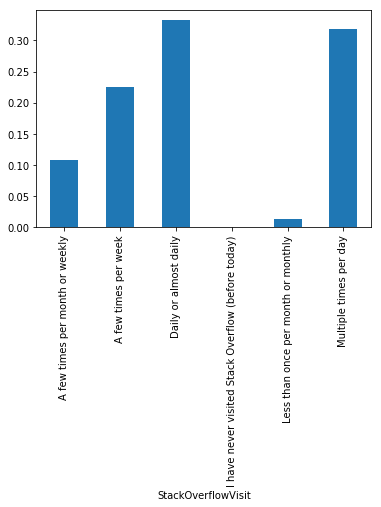

In [252]:
#Check the Visitors who are learners
for_plot = df2[-pd.isnull(df2["is_stack_learner"])]
for_plot = for_plot[for_plot["is_stack_learner"]]
for_plot = for_plot.groupby(["StackOverflowVisit"]).size().reset_index()
for_plot[0] = for_plot[0].apply(lambda x : x/for_plot[0].sum())
plt.figure(1)
for_plot.plot(x ="StackOverflowVisit", kind = "bar" , legend = False)

#As expected if thats your learning resource you obviously would visit regularly.

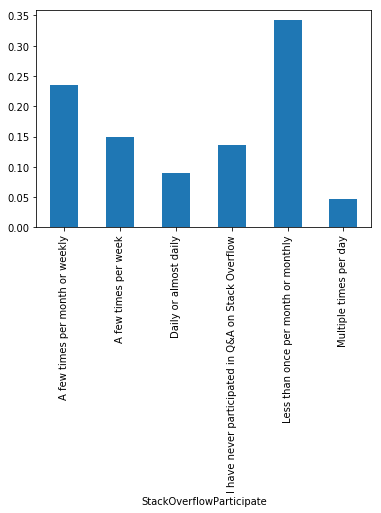

In [253]:
#Lets consider daily visitors and multiple time daily visitors what proportion of them participate
for_plot = df2[-pd.isnull(df2["is_stack_learner"])]
for_plot = for_plot[for_plot["is_stack_learner"]]
for_plot = for_plot[(for_plot["StackOverflowVisit"] == "Daily or almost daily") | (for_plot["StackOverflowVisit"] == "Multiple times per day")]
for_plot = for_plot.groupby(["StackOverflowParticipate"]).size().reset_index()
for_plot[0] = for_plot[0].apply(lambda x : x/for_plot[0].sum())
plt.figure(1)
for_plot.plot(x ="StackOverflowParticipate", kind = "bar" , legend = False)
#Daily visitors only 15% participate in proportion they visit. Whats wrong??

# Some real shit

In [254]:
code = {'Extremely interested':4 , 'Very interested' :3 , 'Somewhat interested' : 1 , 'A little bit interested' : 2 , 'Not at all interested' :0 }

In [255]:
tempo = df1[(df1["Column"].str.contains("StackOverflow")) | (df1["Column"].str.contains("Hypothetical"))].reset_index()

In [256]:
tempo.loc[9][2] #Negative 1

'Please rate your interest in participating in each of the following hypothetical tools on Stack Overflow, where 1 is not at all interested and 5 is extremely interested. A private area for people new to programming'

In [257]:
tempo.loc[0][2] #Postive 1

'How likely is it that you would recommend Stack Overflow overall to a friend or colleague? Where 0 is not likely at all and 10 is very likely.'

In [258]:
tempo.loc[2][2] #Positive 0.25

'Do you have a Stack Overflow account?'

In [259]:
tempo.loc[3][2] #Positive 2

'How frequently would you say you participate in Q&A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.'

In [260]:
tempo.loc[7][2] #Positive 1.5

'Do you consider yourself a member of the Stack Overflow community?'

In [261]:
code  =  {'Extremely interested' :4 , 'Very interested' :3 , 'Somewhat interested' : 2 , 'A little bit interested' : 1 , 'Not at all interested' :0 }

In [262]:
code_reco = {'10 (Very Likely)' :4 , '7' :3 , '9' : 4 , '8' : 3,  '0' : 0 , '1' : 0 , '6' : 2 , '5' : 2 , '4' : 1.5, '3':1 , '2': 1 }

In [263]:
stack_learners = df2[-df2["SelfTaughtTypes"].isnull()]
stack_learners["is_stack_learner"] = stack_learners["SelfTaughtTypes"].str.contains("Stack Overflow")

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [264]:
#Lets do for stack learners first
#stack_learners_only = stack_learners[stack_learners["is_stack_learner"]]
df2["Ease of Participation"] = -1 * stack_learners["HypotheticalTools2"].map(code)

In [265]:
cutting = df2["StackOverflowRecommend"].map(code_reco)

In [266]:
df2["Ease of Participation"] += cutting

In [267]:
accounter = df2["StackOverflowHasAccount"].map({'Yes' : 1 , 'No' : 0 , 'I\'m not sure / I can\'t remember' : 0}) *4 * 0.25

In [268]:
df2["Ease of Participation"] += accounter

In [269]:
participate_map = {'I have never participated in Q&A on Stack Overflow':0, 'Less than once per month or monthly' :1 , 'A few times per month or weekly' : 2 ,'A few times per week' : 3 ,'Daily or almost daily' : 4, 'Multiple times per day' : 4  }

In [270]:
participate_map

{'A few times per month or weekly': 2,
 'A few times per week': 3,
 'Daily or almost daily': 4,
 'I have never participated in Q&A on Stack Overflow': 0,
 'Less than once per month or monthly': 1,
 'Multiple times per day': 4}

In [271]:
participates = df2["StackOverflowParticipate"].map(participate_map)

In [272]:
pd.unique(participates)

array([ 0.,  2., nan,  1.,  4.,  3.])

In [273]:
df2["Ease of Participation"] += (participates * 2)

In [274]:
memberso = df2["StackOverflowConsiderMember"].map({'Yes' : 1 , 'No' : 0 , 'I\'m not sure' : 0}) * 4 * 1.5

In [275]:
df2["Ease of Participation"] += memberso

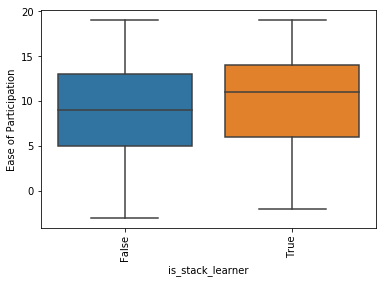

In [276]:
plt.figure(1)
for_plot = df2[-pd.isnull(df2["is_stack_learner"])]
sns.boxplot(x = for_plot["is_stack_learner"] , y = for_plot["Ease of Participation"])# , order = meds)
plt.xticks(rotation = 90)
#pol.set_xticklabels(rotation=90)
plt.show()
#sns.distplot( stack_learners[stack_learners["is_windows"] == 1]["temp"].dropna() , color="blue", label="Use Stack" , bins  = 50)
#sns.distplot( stack_learners[stack_learners["is_windows"] == 0]["temp"].dropna() , color="red", label="Dont use stack" , bins = 50)

In [277]:
df2['is_islamic'] = df2.Country.isin(yo_muslim["Name"])

In [279]:
#Shifting to get log scale ---- for getting concentrated peak.
temp = np.log(df2["Ease of Participation"] + 5)

In [280]:
df2["log_scale_participation_score"] = temp

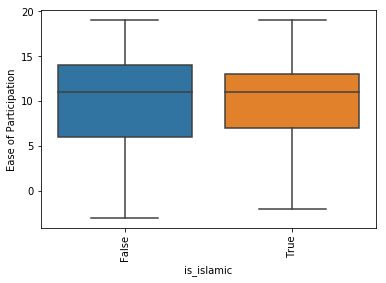

In [281]:
plt.figure(1)
sns.boxplot(x = df2["is_islamic"] , y = df2["Ease of Participation"])# , order = meds)
plt.xticks(rotation = 90)
#pol.set_xticklabels(rotation=90)
plt.show()
#sns.distplot( stack_learners[stack_learners["is_windows"] == 1]["temp"].dropna() , color="blue", label="Use Stack" , bins  = 50)
#sns.distplot( stack_learners[stack_learners["is_windows"] == 0]["temp"].dropna() , color="red", label="Dont use stack" , bins = 50)

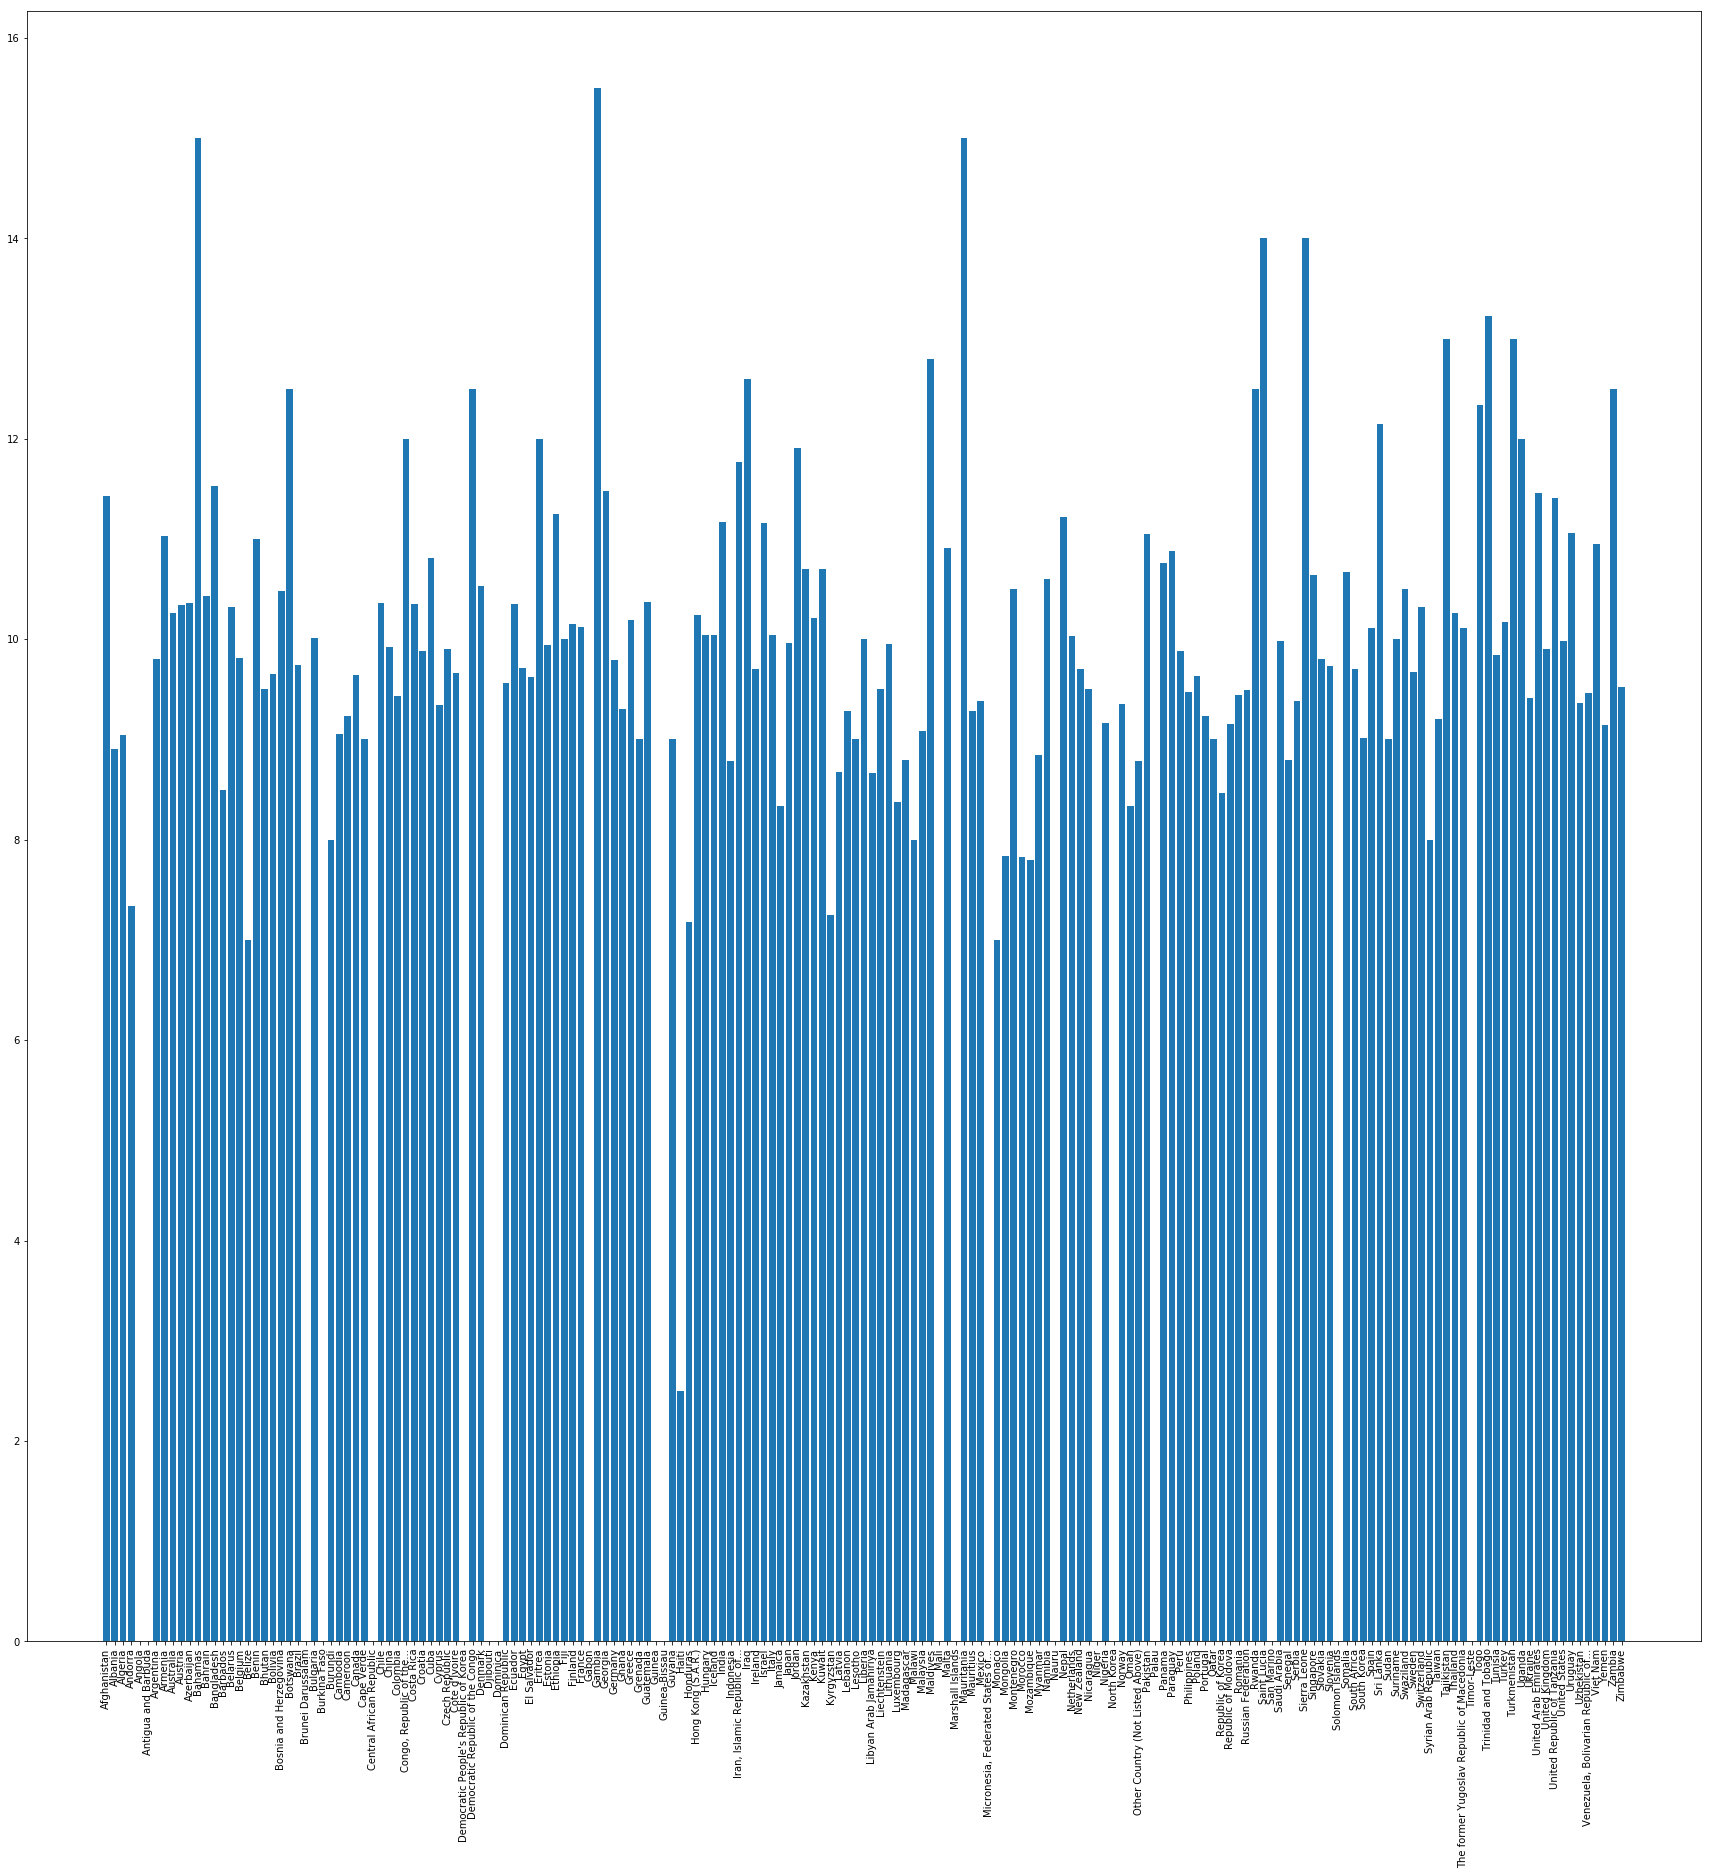

In [282]:
for_plot = df2.groupby(["Country"])["Ease of Participation"].mean().reset_index()
plt.figure(7 , figsize= (30,30))
plt.bar(x = for_plot["Country"] , height = for_plot["Ease of Participation"])
plt.xticks(rotation = 90)
plt.show()

In [283]:
df2["is_windows"] = (df2["OperatingSystem"] == "Windows")

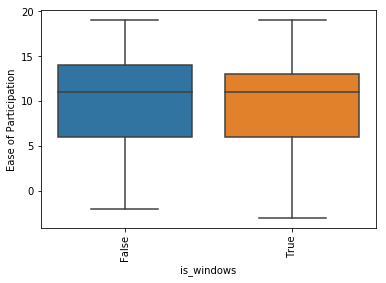

In [284]:
plt.figure(1)
plt.figure(1)
sns.boxplot(x = df2["is_windows"] , y = df2["Ease of Participation"])# , order = meds)
plt.xticks(rotation = 90)
#pol.set_xticklabels(rotation=90)
plt.show()
#sns.distplot( stack_learners[stack_learners["is_windows"] == 1]["temp"].dropna() , color="blue", label="Use Stack" , bins  = 50)
#sns.distplot( stack_learners[stack_learners["is_windows"] == 0]["temp"].dropna() , color="red", label="Dont use stack" , bins = 50)

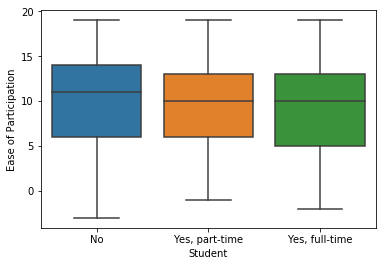

In [285]:
plt.figure(1)
sns.boxplot(x = df2["Student"] , y = df2["Ease of Participation"])
plt.show()

In [286]:
ww2 = pd.DataFrame({col:vals["Ease of Participation"] for col, vals in df2.groupby(["YearsCoding"])})
# find and sort the median values in this new dataframe
meds = ww2.median().sort_values()

In [287]:
meds

0-2 years            8.0
3-5 years           10.0
12-14 years         11.0
15-17 years         11.0
6-8 years           11.0
9-11 years          11.0
18-20 years         12.0
21-23 years         12.0
24-26 years         12.0
27-29 years         12.0
30 or more years    12.0
dtype: float64

# Bro please try to rearrange increasing according to Median, awesome conclusion

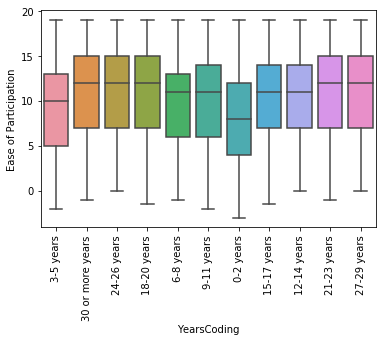

In [288]:
plt.figure(1)
sns.boxplot(x = df2["YearsCoding"] , y = df2["Ease of Participation"])
plt.xticks(rotation = 90)
#pol.set_xticklabels(rotation=90)
plt.show()

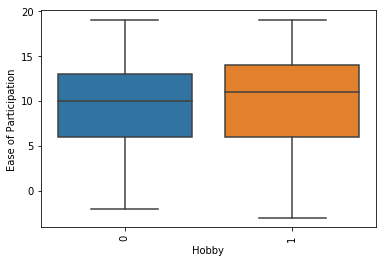

In [289]:
plt.figure(1)
sns.boxplot(x = df2["Hobby"] , y = df2["Ease of Participation"])# , order = meds)
plt.xticks(rotation = 90)
#pol.set_xticklabels(rotation=90)
plt.show()

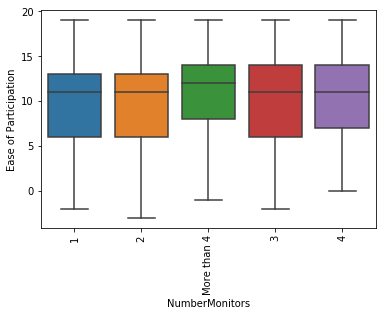

In [290]:
#Number of Monitors??
plt.figure(1)
sns.boxplot(x = df2["NumberMonitors"] , y = df2["Ease of Participation"])# , order = meds)
plt.xticks(rotation = 90)
#pol.set_xticklabels(rotation=90)
plt.show()

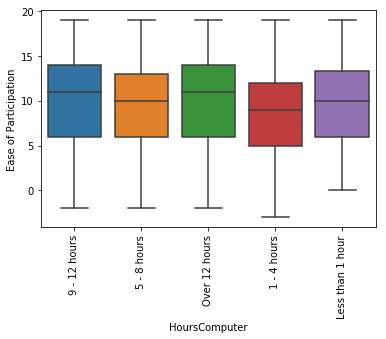

In [291]:
plt.figure(1)
sns.boxplot(x = df2["HoursComputer"] , y = df2["Ease of Participation"])# , order = meds)
plt.xticks(rotation = 90)
#pol.set_xticklabels(rotation=90)
plt.show()

In [292]:
df2.columns.values

array(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student',
       'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize',
       'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction',
       'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus',
       'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3',
       'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7',
       'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1',
       'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4',
       'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7',
       'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10',
       'AssessBenefits11', 'JobContactPriorities1',
       'JobContactPriorities2', 'JobContactPriorities3',
       'JobContactPriorities4', 'JobContactPriorities5',
       'JobEmailPriorities1', 'JobEmailPriorities2',
       'JobEmailPriorities3', 'JobEmailPriorities4',
       'JobEmailPriorities5', 'JobEmailPriorities6',
       'JobE

In [293]:
df2["Salary"] = df2["Salary"].str.replace(',','').astype("float")

In [294]:
#Useless People never give right salary number. waste cell.
plt.figure(1)
for_plot = stack_learners[-np.isnan(stack_learners["Salary"])]
for_plot = for_plot[-np.isnan(for_plot["Ease of Participation"])]
#Removing fake salaries
for_plot = for_plot[for_plot["Salary"] == 0]
sns.regplot(x = for_plot["Salary"], y = for_plot["Ease of Participation"] , fit_reg=False)# , order = meds)
#pol.set_xticklabels(rotation=90)
plt.show()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [295]:
#Something has to be done with multiple choice

MULTIPLE_CHOICE = [
    'CommunicationTools','EducationTypes','SelfTaughtTypes','HackathonReasons', 
    'DatabaseWorkedWith','DatabaseDesireNextYear','PlatformWorkedWith',
    'PlatformDesireNextYear','Methodology','VersionControl',
    'AdBlockerReasons','AdsActions','ErgonomicDevices','Gender',
    'SexualOrientation','RaceEthnicity', 'LanguageWorkedWith'
]
for c in MULTIPLE_CHOICE:
    # Check if there are multiple entries in this column
    temp = df2[c].str.split(';', expand=True)

    # Get all the possible values in this column
    new_columns = pd.unique(temp.values.ravel())
    for new_c in new_columns:
        if new_c and new_c is not np.nan:
            
            # Create new column for each unique column
            idx = df2[c].str.contains(new_c, regex=False).fillna(False)
            df2.loc[idx, f"{c}_{new_c}"] = 1

    # Info to the user
    print(f">> Multiple entries in {c}. Added {len(new_columns)} one-hot-encoding columns")

    # Dont Drop the original column
    #hecko.drop(c, axis=1, inplace=True)

>> Multiple entries in CommunicationTools. Added 13 one-hot-encoding columns
>> Multiple entries in EducationTypes. Added 11 one-hot-encoding columns
>> Multiple entries in SelfTaughtTypes. Added 11 one-hot-encoding columns
>> Multiple entries in HackathonReasons. Added 9 one-hot-encoding columns
>> Multiple entries in DatabaseWorkedWith. Added 23 one-hot-encoding columns
>> Multiple entries in DatabaseDesireNextYear. Added 23 one-hot-encoding columns
>> Multiple entries in PlatformWorkedWith. Added 28 one-hot-encoding columns
>> Multiple entries in PlatformDesireNextYear. Added 28 one-hot-encoding columns
>> Multiple entries in Methodology. Added 12 one-hot-encoding columns
>> Multiple entries in VersionControl. Added 9 one-hot-encoding columns
>> Multiple entries in AdBlockerReasons. Added 8 one-hot-encoding columns
>> Multiple entries in AdsActions. Added 6 one-hot-encoding columns
>> Multiple entries in ErgonomicDevices. Added 6 one-hot-encoding columns
>> Multiple entries in Gende

In [ ]:
pd.isnull(df2[[cols for cols in df2.columns.values if re.search('^Language\S+_' , cols)]])

In [ ]:
#df2 = checko   ------->> for recovery

In [300]:
df2[[cols for cols in df2.columns.values if re.search('^Language\S+_' , cols)]] = df2[[cols for cols in df2.columns.values if re.search('^Language\S+_' , cols)]].fillna(0)

SyntaxError: keyword can't be an expression (<ipython-input-300-817b8a756768>, line 1)

In [299]:
for_plot = df2[[cols for cols in df2.columns.values if re.search('^Language\S+_' , cols)]][df2[[cols for cols in df2.columns.values if re.search('^Language\S+_' , cols)]].sum(axis=1)!=0]
for_plot

,LanguageWorkedWith_JavaScript,LanguageWorkedWith_Python,LanguageWorkedWith_HTML,LanguageWorkedWith_CSS,LanguageWorkedWith_Bash/Shell,LanguageWorkedWith_C#,LanguageWorkedWith_SQL,LanguageWorkedWith_TypeScript,LanguageWorkedWith_C,LanguageWorkedWith_C++,...,LanguageWorkedWith_Rust,LanguageWorkedWith_Julia,LanguageWorkedWith_VBA,LanguageWorkedWith_Perl,LanguageWorkedWith_Cobol,LanguageWorkedWith_Visual Basic 6,LanguageWorkedWith_Delphi/Object Pascal,LanguageWorkedWith_Hack,LanguageWorkedWith_Clojure,LanguageWorkedWith_Ocaml
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
